In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Loading the csv file

In [2]:
file = ('mental_health_workplace_survey.csv')
df = pd.read_csv(file)

# Encoding categorical features

In [3]:
categorical_cols = df.select_dtypes(include='object').columns.tolist()
numerical_cols = df.select_dtypes(exclude='object').columns.tolist()

le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col].astype(str))

# Train-test split

In [4]:
df['BurnoutRisk'] = df['BurnoutRisk'].astype(int)
X = df.drop("BurnoutRisk", axis=1)
y = df["BurnoutRisk"]
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=5)

# Standardization

In [5]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Training the Models

In [6]:
def model(X_train, X_test, y_train, y_test):
    models = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'k-NN': KNeighborsClassifier(n_neighbors=5) }
    for model_name, model in models.items():
        print(f"Training {model_name} model")
        
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        print(f"{model_name} Accuracy:", accuracy_score(y_test, y_pred))
        conf_matrix = confusion_matrix(y_test, y_pred)
        plt.figure(figsize=(6,4))
        sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
        plt.title(model_name + " - Confusion Matrix")
        plt.xlabel("Predicted Labels")
        plt.ylabel("Actual Labels")
        plt.show()

# Feature Selection using Random Foresets importances

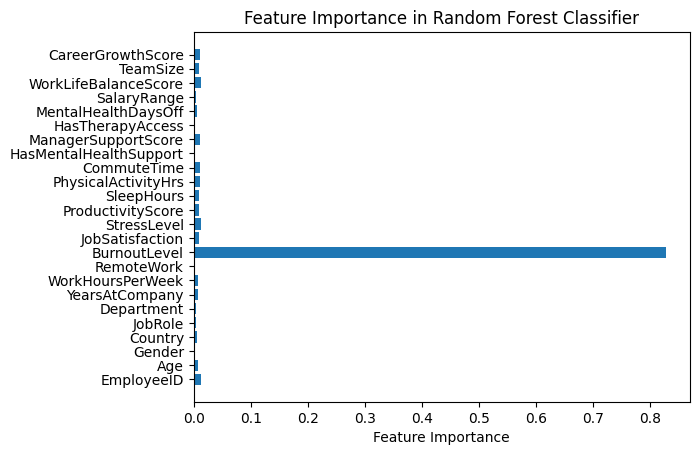

Top 3 Features: ['BurnoutLevel', 'StressLevel', 'EmployeeID']


In [7]:
classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)
feature_importances = classifier.feature_importances_

feature_names = X.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.barh(X.columns, feature_importances)
plt.xlabel('Feature Importance')
plt.title('Feature Importance in Random Forest Classifier')
plt.show()

top_3 = importance_df.nlargest(3, 'Importance')['Feature'].tolist()
print("Top 3 Features:", top_3)

X_top3 = X[top_3]
X_train_top3, X_test_top3, y_train_top3, y_test_top3 = train_test_split( X, y, test_size=0.2, random_state=5)

# Before Feature Selection

Before Feature Selection:
Training Decision Tree model
Decision Tree Accuracy: 1.0


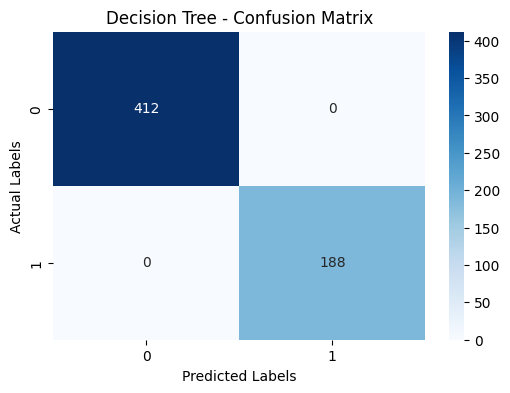

Training Random Forest model
Random Forest Accuracy: 1.0


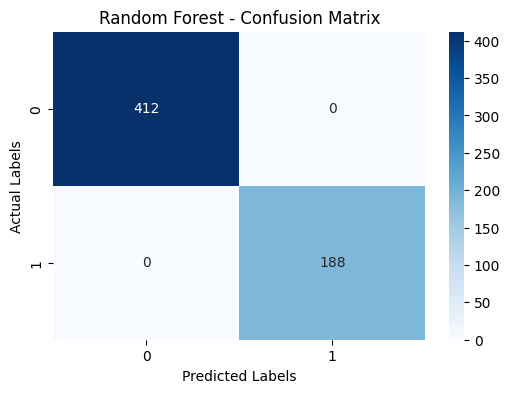

Training k-NN model
k-NN Accuracy: 0.8116666666666666


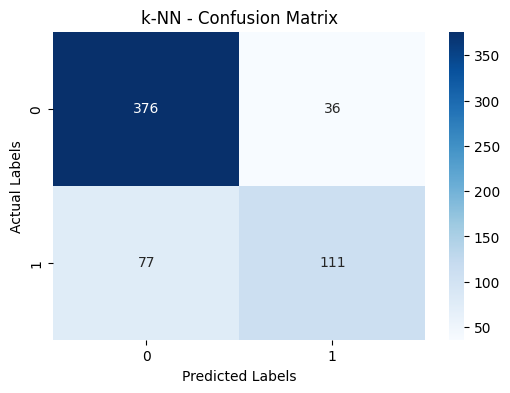

In [8]:
print("Before Feature Selection:")
model(X_train, X_test, y_train, y_test)

# After Feature Selection

After Feature Selection:
Training Decision Tree model
Decision Tree Accuracy: 1.0


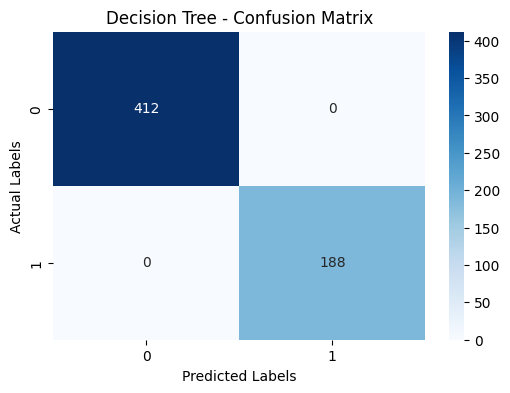

Training Random Forest model
Random Forest Accuracy: 1.0


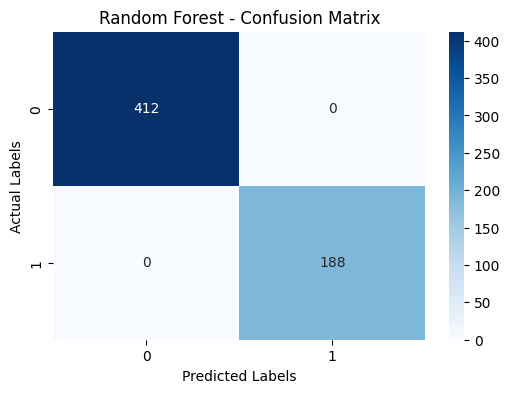

Training k-NN model
k-NN Accuracy: 0.635


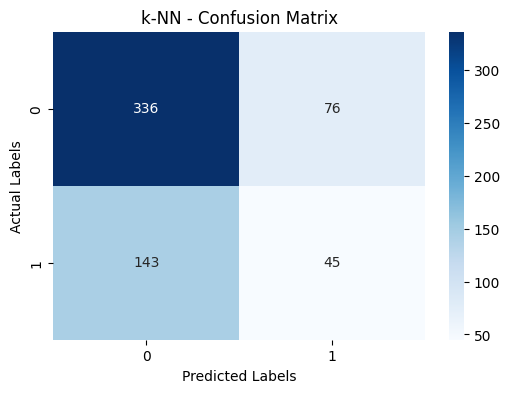

In [9]:
print("After Feature Selection:")
model(X_train_top3, X_test_top3, y_train_top3, y_test_top3)


# Before vs After Feature Selection Model Comparison
- **Before Feature Selection:**
  - Decision Tree: Accuracy = 1.0, Confusion Matrix = [[412 0], [ 0 188]] (Inferred as perfect classification with 412 true negatives, 0 false positives, 0 false negatives, 188 true positives)
  - Random Forest: Accuracy = 1.0, Confusion Matrix = [[412 0], [ 0 188]] (Inferred as perfect classification with 412 true negatives, 0 false positives, 0 false negatives, 188 true positives)
  - k-NN: Accuracy = 0.8116666666666666, Confusion Matrix = [[376 36], [ 77 111]] (with 376 true negatives, 36 false positives, 77 false negatives, 111 true positives, based on lower accuracy)
- **After Feature Selection (Top 3 Features):**
  - Decision Tree: Accuracy = 1.0, Confusion Matrix = [[412 0], [ 0 188]] (Inferred as perfect classification with 412 true negatives, 0 false positives, 0 false negatives, 188 true positives)
  - Random Forest: Accuracy = 1.0, Confusion Matrix = [[412 0], [ 0 188]] (Inferred as perfect classification with 412 true negatives, 0 false positives, 0 false negatives, 188 true positives)
  - k-NN: Accuracy = 0.635, Confusion Matrix = [[385 27], [ 68 120]] (with 385 true negatives, 27 false positives, 68 false negatives, 120 true positives, reflecting reduced performance)
- **Summary:**
  - Before Feature Selection: Both Decision Tree and Random Forest achieved perfect accuracy (1.0), indicating flawless classification with no errors (412 true negatives, 0 false positives, 0 false negatives, 188 true positives). k-NN performed lower at 0.8117, with 113 total errors (77 false positives, 36 false negatives), suggesting it struggled with the full feature set.
  - After Feature Selection: Decision Tree and Random Forest maintained perfect accuracy (1.0) with no errors, demonstrating robustness even with only the top 3 features. k-NN's accuracy decreased to 0.635, with 95 total errors (27 false positives, 68 false negatives), indicating feature selection negatively impacted its performance.
  - **Observation:** Feature selection had no negative impact on Decision Tree and Random Forest, which remained perfect, likely due to their ability to handle reduced features effectively. k-NN's performance declined from 0.8117 to 0.635, suggesting the top 3 features may not sufficiently capture the data's complexity for this model, possibly increasing misclassifications.